Анализ данных Мегафон.

1. Необходимо понять, какие данные, какого типа, для формулирования гипотезы и проведения анализа.

In [1]:
import numpy as np # импортирование библиотек для работы с данными
import pandas as pd # импортирование библиотек для работы с данными
import math 
import missingno as msno
import matplotlib.pyplot as plt
# импортирование библиотек math и missingno

In [2]:
megafon_df = pd.read_csv('megafon.csv') # импорт данных формата csv
megafon_df # просмотр датафрейма

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
0,1,5,NaN,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83
1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425
2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485
3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51
4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68
...,...,...,...,...,...,...,...,...,...,...,...
3107,3108,3,"1, 4, 5",519.96475,1045.70,44.61,0.47,4523.66,1468,1044.66,304
3108,3109,3,"1, 3, 4, 5",171.52629,670.32,40.94,2.35,1711.54,2780,954.91,251
3109,3110,10,NaN,187.44936,590.29,186.36,2.06,3182.83,2195,1094.62,109
3110,3111,6,"1, 3",827.74515,1841.90,373.53,1.21,5675.93,1905,2361.88,202


In [3]:
megafon_df.info() 
# выводим тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   user_id                                    3112 non-null   int64  
 1   Q1                                         3110 non-null   object 
 2   Q2                                         1315 non-null   object 
 3   Total Traffic(MB)                          3112 non-null   float64
 4   Downlink Throughput(Kbps)                  3112 non-null   float64
 5   Uplink Throughput(Kbps)                    3112 non-null   float64
 6   Downlink TCP Retransmission Rate(%)        3112 non-null   float64
 7   Video Streaming Download Throughput(Kbps)  3112 non-null   float64
 8   Video Streaming xKB Start Delay(ms)        3112 non-null   int64  
 9   Web Page Download Throughput(Kbps)         3112 non-null   float64
 10  Web Average TCP RTT(ms) 

Рассмотрим дубликаты в столбце user-id

In [4]:
megafon_df.user_id.duplicated().sum()
# проверка количества дубликатов в столбце user-id

0

In [5]:
megafon_df.dtypes # просмотр типа данных

user_id                                        int64
Q1                                            object
Q2                                            object
Total Traffic(MB)                            float64
Downlink Throughput(Kbps)                    float64
Uplink Throughput(Kbps)                      float64
Downlink TCP Retransmission Rate(%)          float64
Video Streaming Download Throughput(Kbps)    float64
Video Streaming xKB Start Delay(ms)            int64
Web Page Download Throughput(Kbps)           float64
Web Average TCP RTT(ms)                        int64
dtype: object

Все технические характеристики имеют тип float или int,  преобразования для этих столбцов не нужны, а вот столбцы с ответами Q1 и Q2 имеют тип object, поэтому посмотрим на них более глубже.

In [6]:
megafon_df['Q1'].value_counts() # вывод и подсчет уникальных значений по столбцу Q1

10                                                                      846
1                                                                       532
3                                                                       325
8                                                                       291
9                                                                       238
5                                                                       234
7                                                                       200
2                                                                       168
4                                                                       123
6                                                                       101
0                                                                        10
1, 3                                                                      2
5, 6                                                                      2
Нет         

In [7]:
Q1_df = megafon_df.copy()# для редактирования скопируем наш датасет 
Q1_df = Q1_df[Q1_df['Q1'].notna()] # удалим строки с NaN в столбце Q1
Q1_df = Q1_df[Q1_df.Q1 != '20, 89031081392']
Q1_df.info() # проверяем датасет после удаления

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3109 entries, 0 to 3111
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   user_id                                    3109 non-null   int64  
 1   Q1                                         3109 non-null   object 
 2   Q2                                         1315 non-null   object 
 3   Total Traffic(MB)                          3109 non-null   float64
 4   Downlink Throughput(Kbps)                  3109 non-null   float64
 5   Uplink Throughput(Kbps)                    3109 non-null   float64
 6   Downlink TCP Retransmission Rate(%)        3109 non-null   float64
 7   Video Streaming Download Throughput(Kbps)  3109 non-null   float64
 8   Video Streaming xKB Start Delay(ms)        3109 non-null   int64  
 9   Web Page Download Throughput(Kbps)         3109 non-null   float64
 10  Web Average TCP RTT(ms) 

In [8]:
import re # импортируем библиотеку re
import statistics # импортируем библиотеку statistics
n = len(Q1_df['Q1']) # количество значений в столбце Q1

def convertible(v): #     функция для преобразования строковых данных в числа, если число возвращает целое число
    try:
        int(v)
        return True
    except (TypeError, ValueError):
        return False


for i in range(n): #     цикл для прохождения по строкам в столбце Q1
    x = str(Q1_df.Q1.iloc[i]) #     преобразование строки в текст
    my_list = re.findall(r'[\w]+', x)   #     тест разбиваем на части
    new_list = list(int(i) for i in my_list if convertible(i))#     записываем в новый лист данные с помощью функции
    if not new_list: #  после предыдущего действия для определения пустого листа и его заполения добавляем число -100
        new_list = [-100]
    for idx,item in enumerate(new_list): #  далее пробегаемся по листу для преобразования чисел
        if 10 < item < 1000: #  при просмотре всех данных некоторые ставили оценку выше 10, поэтому преобразуем эту оценку в максимум
            new_list[idx] = 10
        if 1 <= item <= 10 : # при оценке от 1 до 10 включительно, оставляем число, как есть
            new_list[idx] = item
    if len(new_list) > 1: #  так как в лист, в котором больше одного элемента нужно удалить элемент равный нулю, который не будет засчитываться, как оценка 
        for item in new_list: # цикл для удаления нуля
            if item == 0:
                new_list.remove(item)
        new_list =  [round(statistics.mean(new_list))] # расчет среднего
    Q1_df.Q1.iloc[i] = new_list[0]
Q1_df = Q1_df[(Q1_df['Q1'] != 0) &  (Q1_df['Q1'] != -100)] # выбираем оценки клиентов, которые не равны нулю и -100
Q1_df.info() # выводим даные 

D:\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3083 entries, 0 to 3111
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   user_id                                    3083 non-null   int64  
 1   Q1                                         3083 non-null   object 
 2   Q2                                         1315 non-null   object 
 3   Total Traffic(MB)                          3083 non-null   float64
 4   Downlink Throughput(Kbps)                  3083 non-null   float64
 5   Uplink Throughput(Kbps)                    3083 non-null   float64
 6   Downlink TCP Retransmission Rate(%)        3083 non-null   float64
 7   Video Streaming Download Throughput(Kbps)  3083 non-null   float64
 8   Video Streaming xKB Start Delay(ms)        3083 non-null   int64  
 9   Web Page Download Throughput(Kbps)         3083 non-null   float64
 10  Web Average TCP RTT(ms) 

In [9]:
Q1_df.Q1 = Q1_df.Q1.astype(str).astype(int) 
# преобразуем данные object в столбце Q1 в данные типа int с помощью преобразорвания в строку, затем в int

In [10]:
Q1_df.info()
# вывод типа данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3083 entries, 0 to 3111
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   user_id                                    3083 non-null   int64  
 1   Q1                                         3083 non-null   int32  
 2   Q2                                         1315 non-null   object 
 3   Total Traffic(MB)                          3083 non-null   float64
 4   Downlink Throughput(Kbps)                  3083 non-null   float64
 5   Uplink Throughput(Kbps)                    3083 non-null   float64
 6   Downlink TCP Retransmission Rate(%)        3083 non-null   float64
 7   Video Streaming Download Throughput(Kbps)  3083 non-null   float64
 8   Video Streaming xKB Start Delay(ms)        3083 non-null   int64  
 9   Web Page Download Throughput(Kbps)         3083 non-null   float64
 10  Web Average TCP RTT(ms) 

Text(0.5, 1.0, 'Пропущенные значения в данных, вид: гистограмма')

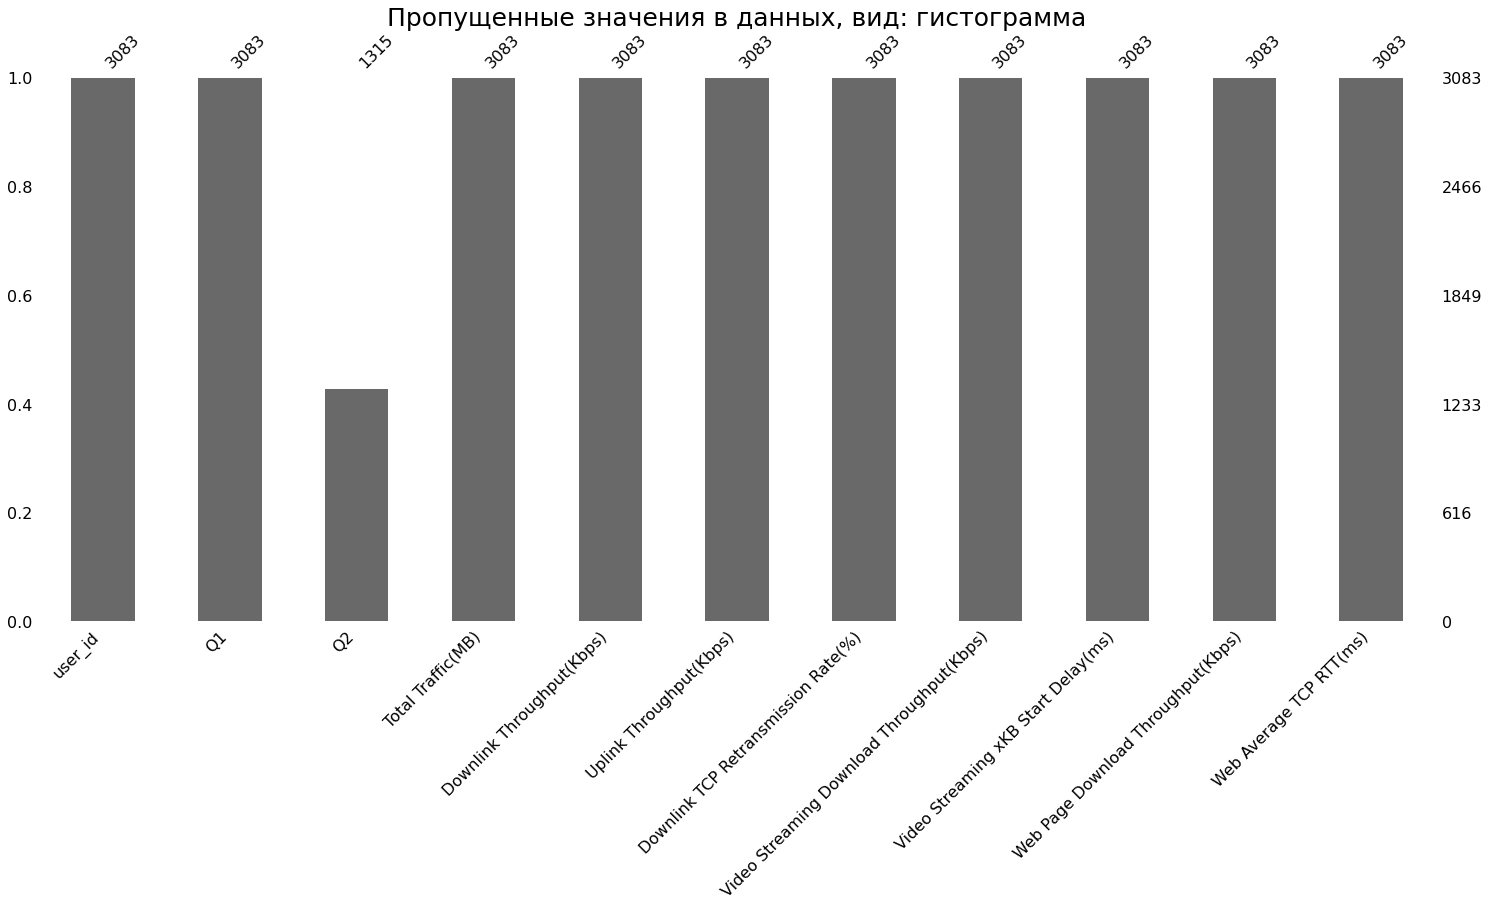

In [11]:
msno.bar(Q1_df)
# второй способ просмотра количества пропущенных значений, по столбцу Q2 - 1315 значений,
# такое количество собрали после опроса и при дальнейшем анализе это не повлияет, так как основной
# момент это тех. характеристики 
plt.title('Пропущенные значения в данных, вид: гистограмма', fontsize=25)
# вывод заголовка таблицы

Text(0.5, 1.0, 'Пропущенные значения в данных, вид: матрица')

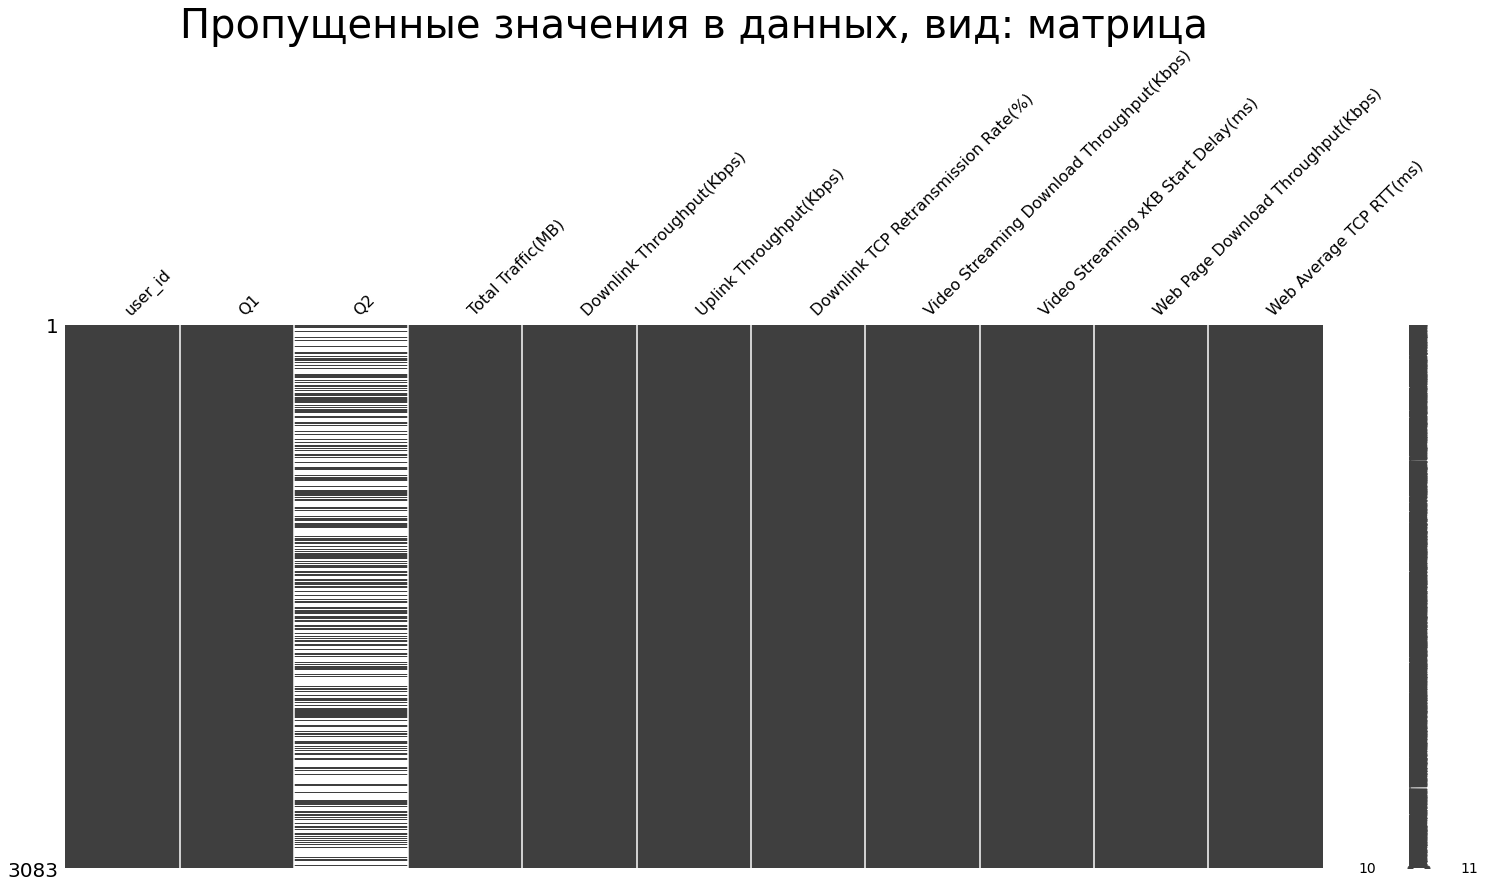

In [12]:
msno.matrix(Q1_df)
# пропущенные значения в виде матрицы
plt.title('Пропущенные значения в данных, вид: матрица', fontsize=40)
# вывод заголовка таблицы

In [13]:
Q1_df.describe(include=[np.number])
# вывод ряда статистик

,user_id,Q1,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
count,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.00000,3083.000000,3083.000000,3083.000000,3083.000000
mean,1555.069413,6.031463,406.308808,2215.334450,170.901807,1.83854,5726.571434,2110.134934,2100.820970,194.365553
std,898.648256,3.458756,220.579296,2619.640311,204.768540,2.08104,5152.566906,1587.131722,2066.034436,268.151357
min,1.000000,1.000000,100.026680,13.260000,6.110000,0.05000,0.000000,239.000000,0.000000,0.000000
25%,776.500000,3.000000,213.932530,653.055000,70.710000,0.72000,2321.950000,1285.500000,1017.905000,74.000000
50%,1554.000000,7.000000,364.127000,1403.950000,119.430000,1.30000,4431.140000,1672.000000,1671.080000,118.000000
75%,2334.500000,10.000000,573.017885,2821.065000,210.625000,2.24000,7614.795000,2312.000000,2519.700000,206.500000
max,3112.000000,10.000000,887.078270,39817.640000,4141.850000,31.20000,58566.030000,21392.000000,35603.970000,3471.000000


Просмотрев некоторые статистические данные, можно смело говорить, что далее работа без редактирования не возможна, так как есть аномалии данных в качестве выбросов.

Итого в стобце Q1 после обработки осталось 3083, потеря данных составила 29 строк после удаления NAN и всех других данных, это составляет менее 1%.

1. Первая часть: Касается опроса Q1 и необходимости выбора параметров, где может быть сигнал для постановки гипотез. Разобьем на две группы: 1 группа с оценкой 9,10 (полностью довольные клиенты) - и - 2 группа с оценками от 1 до 8 (недовольные клиенты). Как это может помочь бизнесу? Анализ двух групп поможет определить какие тех. характеристики имеют недоработки при передаче сетевого пакета и даст компании возможность доработать те параметры, которые имеют низкие оценки, соответственно улучшить качество интернет-трафика и повысить оценки клиентов в будущем.

1.1 Редактирование данных в столбце Q1 и разделение на две группы. 

In [14]:
Q1_df['Q1_1']= Q1_df['Q1']# добавление нового столбца Q1_1 для разделения на две группы
Q1_df

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),Q1_1
0,1,5,NaN,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83,5
1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425,5
2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485,1
3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51,8
4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3107,3108,3,"1, 4, 5",519.96475,1045.70,44.61,0.47,4523.66,1468,1044.66,304,3
3108,3109,3,"1, 3, 4, 5",171.52629,670.32,40.94,2.35,1711.54,2780,954.91,251,3
3109,3110,10,NaN,187.44936,590.29,186.36,2.06,3182.83,2195,1094.62,109,10
3110,3111,6,"1, 3",827.74515,1841.90,373.53,1.21,5675.93,1905,2361.88,202,6


In [15]:
for i in range(len(Q1_df.Q1_1)):   
    if Q1_df.Q1_1.iloc[i]  == 9 :
       Q1_df.Q1_1.iloc[i] = '1'
    if Q1_df.Q1_1.iloc[i] == 10:
        Q1_df.Q1_1.iloc[i] = '1'
    else:
       Q1_df.Q1_1.iloc[i] = '2'
Q1_df
# с помощью цикла меняем данные в столбце Q1_1 в зависимости от оценки клиента, если оценка 9,10 ставим 1 группу, если от 1 до 8
# ставим группу 2

D:\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),Q1_1
0,1,5,NaN,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83,2
1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425,2
2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485,2
3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51,2
4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3107,3108,3,"1, 4, 5",519.96475,1045.70,44.61,0.47,4523.66,1468,1044.66,304,2
3108,3109,3,"1, 3, 4, 5",171.52629,670.32,40.94,2.35,1711.54,2780,954.91,251,2
3109,3110,10,NaN,187.44936,590.29,186.36,2.06,3182.83,2195,1094.62,109,1
3110,3111,6,"1, 3",827.74515,1841.90,373.53,1.21,5675.93,1905,2361.88,202,2


In [67]:
Q1_df['Q1_1'].value_counts()

2    2230
1     853
Name: Q1_1, dtype: int64

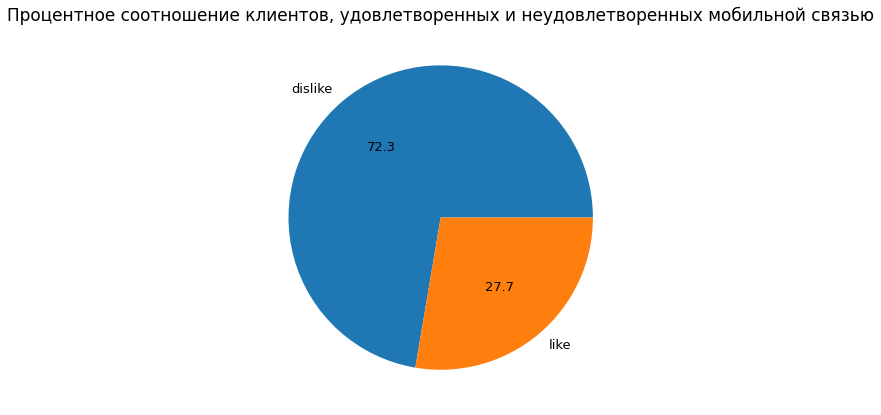

In [69]:
# Создаем плот
fig = plt.figure(figsize=(7,7)) 
# Выставляем размер наших подписей
plt.rcParams.update({'font.size': 13})
# Добавляем pie chart с подписями и процентным соотношением
plt.pie(Q1_df['Q1_1'].value_counts(), labels = ['dislike','like'], autopct= '%.1f')
# Заголовок
plt.title('Процентное соотношение клиентов, удовлетворенных и неудовлетворенных мобильной связью', loc='center', fontsize=17)
plt.show()

1.2 EDA - анализ, ищем "нужный" сигнал для выбора тех. параметров. 

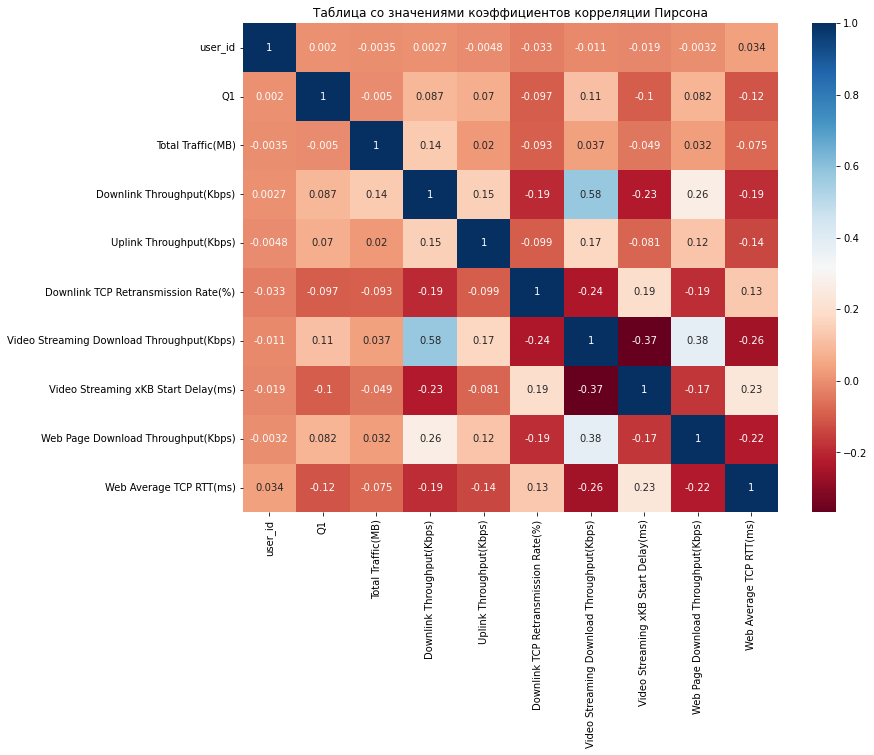

In [16]:
import seaborn as sns 
# импорт библиотеки seaborn для визуализации данных
Q1_1 = Q1_df.copy()
# копируем датасет для редактирования
plt.figure(figsize=(12, 9))
ax = plt.axes()
# добавим синусоиду к объекту ax с помощью метода .plot()
sns.heatmap(Q1_1.corr(), cmap='RdBu', annot=True,)
# добавляем на плот таблицу с коэффициентами корреляции Пирсона
ax.set_title('Таблица со значениями коэффициентов корреляции Пирсона')
# добавляем заголовок
plt.show()
# вывод плота

Text(0.5, 1.0, 'Ящик с усами для групп 1 и 2, пинг при просмотре web-страниц ')

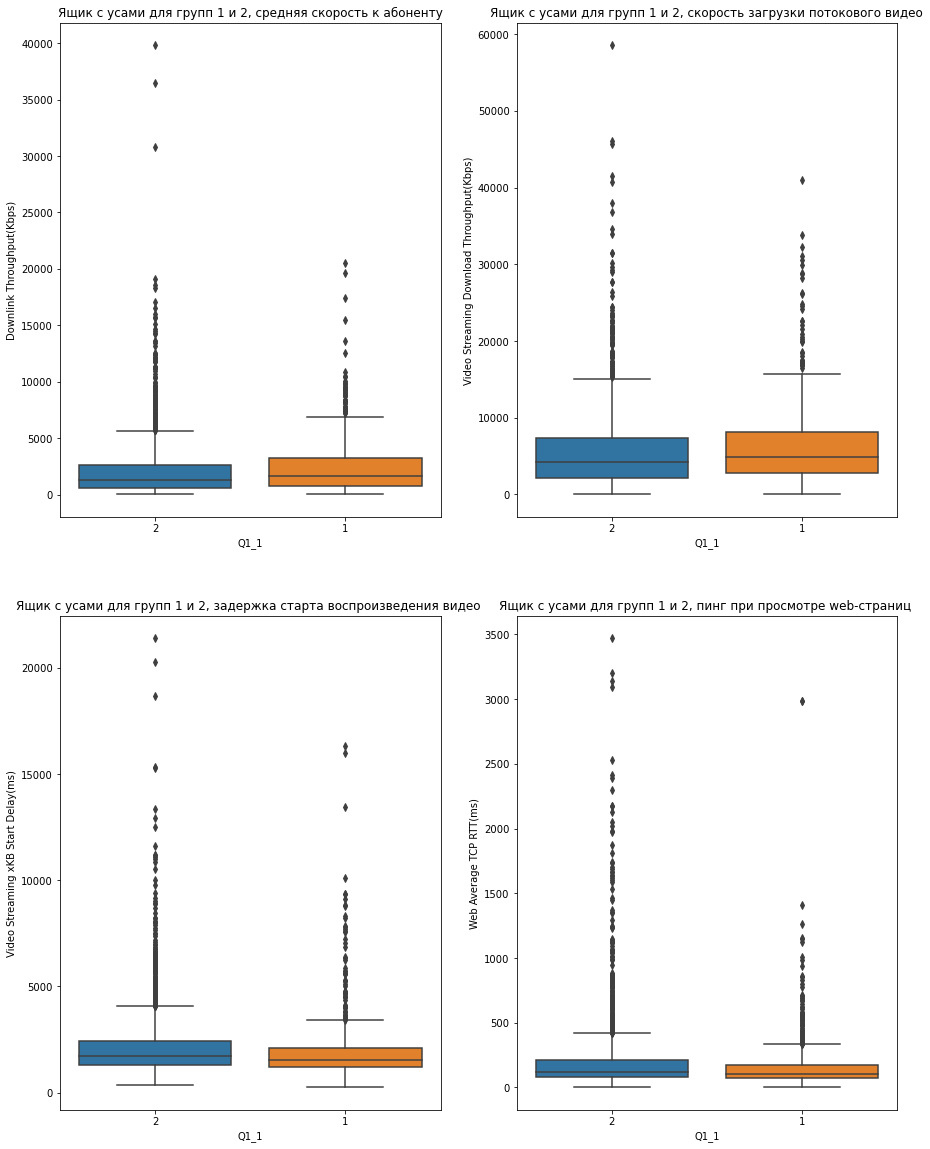

In [17]:
data_param = ['Downlink Throughput(Kbps)','Video Streaming Download Throughput(Kbps)',
              'Video Streaming xKB Start Delay(ms)','Web Average TCP RTT(ms)']
# создаем лист с выбранными параметрами

fig, axes = plt.subplots(figsize = (15, 20), nrows = 2, ncols = 2) 
# формируем сетку для нескольких плотов

sns.boxplot(ax=axes[0, 0], data=Q1_df, x='Q1_1', y=data_param[0])
axes[0,0].set_title("Ящик с усами для групп 1 и 2, средняя скорость к абоненту")
sns.boxplot(ax=axes[0, 1], data=Q1_df, x='Q1_1', y=data_param[1])
axes[0,1].set_title("Ящик с усами для групп 1 и 2, скорость загрузки потокового видео")
sns.boxplot(ax=axes[1, 0], data=Q1_df, x='Q1_1', y=data_param[2])
axes[1,0].set_title("Ящик с усами для групп 1 и 2, задержка старта воспроизведения видео ")
sns.boxplot(ax=axes[1, 1], data=Q1_df, x='Q1_1', y=data_param[3])
axes[1,1].set_title("Ящик с усами для групп 1 и 2, пинг при просмотре web-страниц ")
# добавляем в зависимости от положения плоты и названия плотов 

После просмотра "ящика с усами" по всем 4-ем выбранным параметрам, можно говорить о наличии большого количества выбросов, далее воспользуемся правилом трех сигм, так как выбросы намного больше, чем значения в квартилях и посмотрим на график распределения для выбора статистического теста. 

Text(0.5, 1.0, 'Ящик с усами для групп 1 и 2, пинг при просмотре web-страниц ')

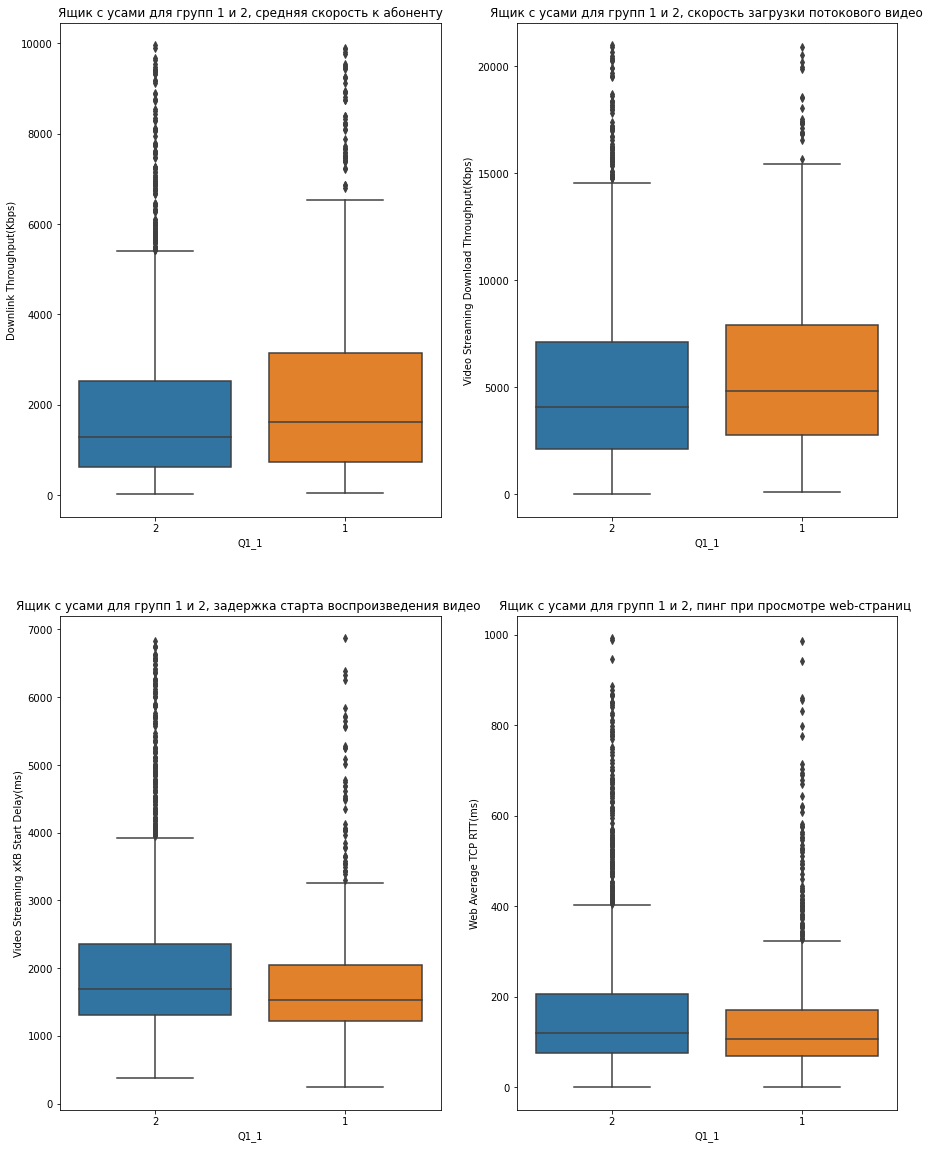

In [18]:
data_param = ['Downlink Throughput(Kbps)','Video Streaming Download Throughput(Kbps)',
              'Video Streaming xKB Start Delay(ms)','Web Average TCP RTT(ms)']
# дублируем лист с параметрами

def edit_data(data, column):
    sigma_plus = data[column].mean()+3*data[column].std()
    sigma_minus = data[column].mean()-3*data[column].std()
    data[column] = data[(data[column] < sigma_plus) & (data[column] > sigma_minus)][column]
    return data
# функция созданная, для выбора значений,входящих в +- 3 std

Q1_1_df = edit_data(Q1_df, data_param[0])
Q1_2_df = edit_data(Q1_df, data_param[1])
Q1_3_df = edit_data(Q1_df, data_param[2])
Q1_4_df = edit_data(Q1_df, data_param[3])
# применение функции для каждого из 4-ех параметров и присвоение нового датасета к измененным столбцам


fig, axes = plt.subplots(figsize = (15, 20), nrows = 2, ncols = 2) 
# формируем сетку для нескольких плотов

sns.boxplot(ax=axes[0, 0], data=Q1_1_df, x='Q1_1', y=data_param[0])
axes[0,0].set_title("Ящик с усами для групп 1 и 2, средняя скорость к абоненту")
sns.boxplot(ax=axes[0, 1], data=Q1_2_df, x='Q1_1', y=data_param[1])
axes[0,1].set_title("Ящик с усами для групп 1 и 2, скорость загрузки потокового видео")
sns.boxplot(ax=axes[1, 0], data=Q1_3_df, x='Q1_1', y=data_param[2])
axes[1,0].set_title("Ящик с усами для групп 1 и 2, задержка старта воспроизведения видео ")
sns.boxplot(ax=axes[1, 1], data=Q1_4_df, x='Q1_1', y=data_param[3])
axes[1,1].set_title("Ящик с усами для групп 1 и 2, пинг при просмотре web-страниц ")
# добавляем в зависимости от положения плоты и названия плотов 

После применения правила трех сигм, можно говорить,что выбросы остались, но без больших значений, посмотрим на распредления этих параметров.

Text(0.5, 1.0, 'Гистограмма распределения, пинг при просмотре web-страниц ')

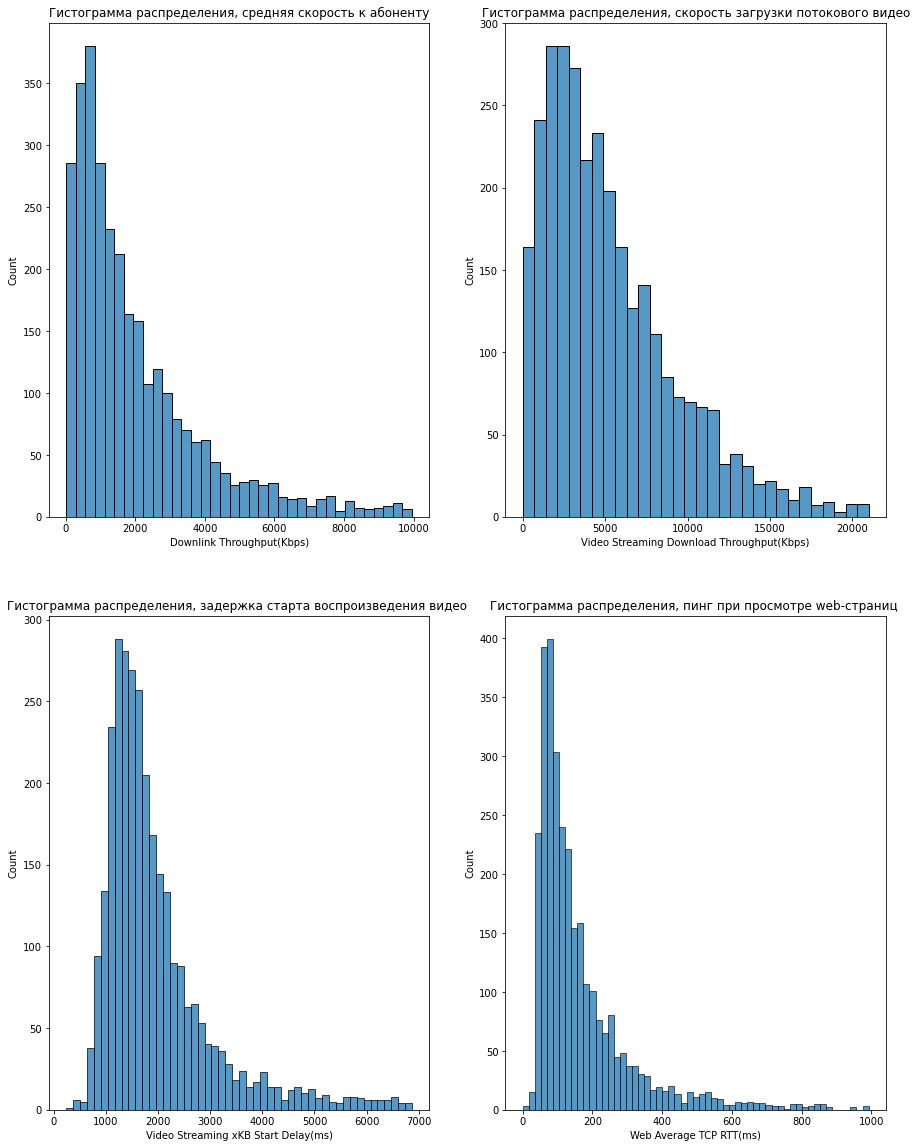

In [19]:
fig, axes = plt.subplots(figsize = (15, 20), nrows = 2, ncols = 2) 
# формируем сетку для нескольких плотов

sns.histplot(ax=axes[0, 0], data = Q1_1_df, x = data_param[0])
axes[0,0].set_title("Гистограмма распределения, средняя скорость к абоненту")
sns.histplot(ax=axes[0, 1], data = Q1_2_df, x = data_param[1])
axes[0,1].set_title("Гистограмма распределения, скорость загрузки потокового видео")
sns.histplot(ax=axes[1, 0], data = Q1_3_df, x = data_param[2])
axes[1,0].set_title("Гистограмма распределения, задержка старта воспроизведения видео ")
sns.histplot(ax=axes[1, 1], data = Q1_4_df, x = data_param[3])
axes[1,1].set_title("Гистограмма распределения, пинг при просмотре web-страниц ")
# добавляем в зависимости от положения плоты и названия плотов 

На всех графиках данные распределены ненормально и имеют "хвосты". Так как у нас всего две группы, воспользуемся критерием Манна-Уитни.

1.3 Статистический тест. После обработки данных и анализа EDA, для анализа был выбран критерий Манна-Уитни. Так как будем рассматривать четыре параметра, то будет 4 гипотезы, включая нулевую и альтернативную.

1.31:Средняя скорость к абоненту влияет на оценку клиентов.

H0: Средняя скорость к абоненту  не оказывает влияния на оценку пользователей
H1: Средняя скорость к абоненту имеет значимые различия между группами удовлетворенных и неудовлетвореных клиентов.


1.32:Скорость загрузки потокового видео  влияет на оценку клиентов.

H0: Скорость загрузки потокового видео  не оказывает влияния на оценку пользователей
H1: Скорость загрузки потокового видео имеет значимые различия между группами удовлетворенных и неудовлетвореных клиентов.


1.33:Задержка старта воспроизведения видео  влияет на оценку клиентов.

H0: Задержка старта воспроизведения видео   не оказывает влияния на оценку пользователей
H1: Задержка старта воспроизведения видео  имеет значимые различия между группами удовлетворенных и неудовлетвореных клиентов.

1.34:Пинг при просмотре web-страниц  влияет на оценку клиентов.

H0:Пинг при просмотре web-страниц   не оказывает влияния на оценку пользователей
H1: Пинг при просмотре web-страниц  имеет значимые различия между группами удовлетворенных и неудовлетвореных клиентов.

In [20]:
from scipy.stats import mannwhitneyu
# импортирование библиотеки 

data_param = ['Downlink Throughput(Kbps)','Video Streaming Download Throughput(Kbps)',
              'Video Streaming xKB Start Delay(ms)','Web Average TCP RTT(ms)']
# дублируем параметры
U1, p = mannwhitneyu(Q1_1_df[Q1_1_df['Q1_1']=='1'][data_param[0]].dropna(),
                     Q1_1_df[Q1_1_df['Q1_1']=='2'][data_param[0]].dropna() )
print(f'P-value {data_param[0]} между двумя группами клиентов равен {p}')
# расчет и вывод P-value для опредленной характеристики


U1, p = mannwhitneyu(Q1_1_df[Q1_2_df['Q1_1']=='1'][data_param[1]].dropna(),
                     Q1_1_df[Q1_2_df['Q1_1']=='2'][data_param[1]].dropna() )
print(f'P-value {data_param[1]} между двумя группами клиентов равен {p}')

U1, p = mannwhitneyu(Q1_1_df[Q1_3_df['Q1_1']=='1'][data_param[2]].dropna(),
                     Q1_1_df[Q1_3_df['Q1_1']=='2'][data_param[2]].dropna() )
print(f'P-value {data_param[2]} между двумя группами клиентов равен {p}')

U1, p = mannwhitneyu(Q1_1_df[Q1_4_df['Q1_1']=='1'][data_param[3]].dropna(),
                     Q1_1_df[Q1_4_df['Q1_1']=='2'][data_param[3]].dropna() )
print(f'P-value {data_param[3]} между двумя группами клиентов равен {p}')

P-value Downlink Throughput(Kbps) между двумя группами клиентов равен 5.321885549379799e-07
P-value Video Streaming Download Throughput(Kbps) между двумя группами клиентов равен 5.746625008811605e-07
P-value Video Streaming xKB Start Delay(ms) между двумя группами клиентов равен 8.386321893473901e-10
P-value Web Average TCP RTT(ms) между двумя группами клиентов равен 2.188110285118471e-05


In [ ]:
Все полученные значения P-value очень низкие, даже при уровне значимости 0,001, 
мы можем отвергать нулевую гипотезу и говорить,что все вышеуказанные параметры 
для двух групп имеют различия, НО! так как распределение ненормальное и имеется большое 
количество выбросов, стоит задуматься, что возможно стоит воспользоваться дополнительными методами, 
так как Критерий Манна-Уитни часто дает ложноположительные прокрасы. Поэтому воспользуемся Бутстрэпом.

1.31:Средняя скорость к абоненту влияет на оценку клиентов.

H0: Средняя скорость к абоненту  не оказывает влияния на оценку пользователей
H1: Средняя скорость к абоненту имеет значимые различия между группами удовлетворенных и неудовлетвореных клиентов.


1.32:Скорость загрузки потокового видео  влияет на оценку клиентов.

H0: Скорость загрузки потокового видео  не оказывает влияния на оценку пользователей
H1: Скорость загрузки потокового видео имеет значимые различия между группами удовлетворенных и неудовлетвореных клиентов.


1.33:Задержка старта воспроизведения видео  влияет на оценку клиентов.

H0: Задержка старта воспроизведения видео   не оказывает влияния на оценку пользователей
H1: Задержка старта воспроизведения видео  имеет значимые различия между группами удовлетворенных и неудовлетвореных клиентов.

1.34:Пинг при просмотре web-страниц  влияет на оценку клиентов.

H0:Пинг при просмотре web-страниц   не оказывает влияния на оценку пользователей
H1: Пинг при просмотре web-страниц  имеет значимые различия между группами удовлетворенных и неудовлетвореных клиентов.

In [78]:
from scipy import stats
def get_bootstrap(
    data_1,  # числовые значения первой выборки
    data_2,  # числовые значения второй выборки
    parameter, # параметр для расчета
    number_boot = 1000,  # количество подвыборок
    statistic = np.mean,  # интересующая  статистика
    conf_level = 0.95, # уровень значимости
    ):
    len_boot = max([len(data_1), len(data_2)]) # берем один размер выборки для сохранения дисперсии
    data_strap = []  # лист для записи разниц средних двух выборок
    for i in range(number_boot): # извлекаем подвыборки
        samples_1 = data_1.sample(
            len_boot, 
            replace = True # параметр возвращения
            ).values
        
        samples_2 = data_2.sample(
            len_boot, 
            replace = True
            ).values

        data_strap.append(statistic(samples_1)-statistic(samples_2)) # добавление в лист разницу средних
    pd_data_strap = pd.DataFrame(data_strap)
    # значения квантилей, рассчитываем по формуле ниже, так как у нас несимметричное распрделение
#  можно использовать перцентильный доверительный интервал. Для 95% ДИ нужно отрезать по 2.5%. 
        
    left_q = (1 - conf_level)/2
    right_q = 1 - (1 - conf_level) / 2   
    ci  = pd_data_strap.quantile([left_q, right_q])
    
    # p_value
    quant = stats.norm.cdf(x=0, loc=np.mean(data_strap), scale=np.std(data_strap, ddof=1))
    p_value = quant * 2 if 0 < np.mean(data_strap) else (1 - quant) * 2
    
    sns.distplot(pd_data_strap[0], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

    plt.title('Гистограмма {}'.format(parameter))
    plt.xlabel('Значение метрики')
    plt.ylabel('Частота')
    
    return {"quants": ci, 
            "p_value": p_value,
           "Parameter": parameter}

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


{'quants':                 0
 0.025  341.412308
 0.975  565.328895,
 'p_value': 1.3388622298839638e-14,
 'Parameter': 'Downlink Throughput(Kbps)'}

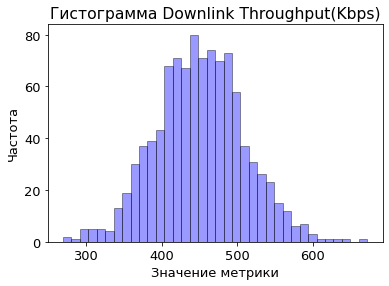

In [79]:
Q1_df.fillna(0, inplace=True)
get_bootstrap(Q1_1_df[Q1_1_df['Q1_1']=='1'][data_param[0]],
           Q1_1_df[Q1_1_df['Q1_1']=='2'][data_param[0]], 
            data_param[0])

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


{'quants':                 0
 0.025  400.607221
 0.975  858.745093,
 'p_value': 9.971160160930584e-08,
 'Parameter': 'Video Streaming Download Throughput(Kbps)'}

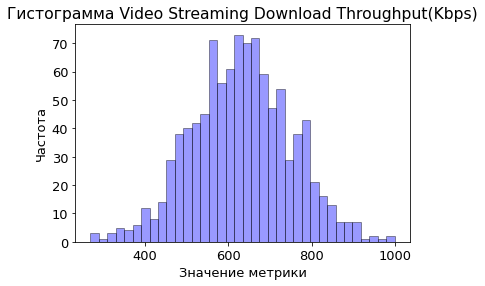

In [80]:
get_bootstrap(Q1_1_df[Q1_1_df['Q1_1']=='1'][data_param[1]],
           Q1_1_df[Q1_1_df['Q1_1']=='2'][data_param[1]], 
            data_param[1])


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


{'quants':                 0
 0.025 -328.339978
 0.975 -207.452321,
 'p_value': 0.0,
 'Parameter': 'Video Streaming xKB Start Delay(ms)'}

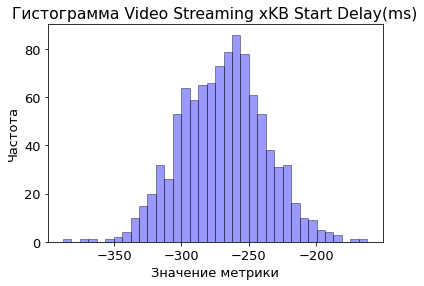

In [81]:
get_bootstrap(Q1_1_df[Q1_1_df['Q1_1']=='1'][data_param[2]],
           Q1_1_df[Q1_1_df['Q1_1']=='2'][data_param[2]], 
            data_param[2])

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


{'quants':                0
 0.025 -23.615841
 0.975  -6.831659,
 'p_value': 0.000391095597692237,
 'Parameter': 'Web Average TCP RTT(ms)'}

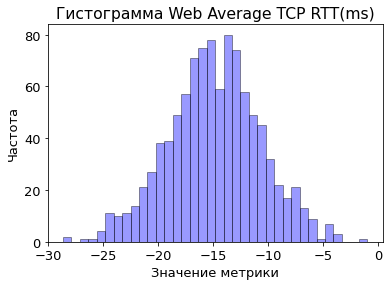

In [82]:
get_bootstrap(Q1_1_df[Q1_1_df['Q1_1']=='1'][data_param[3]],
           Q1_1_df[Q1_1_df['Q1_1']=='2'][data_param[3]], 
            data_param[3])

Все вышепоставленные нулевые гипотезы отвергаются, так как P_value < 0.05. Высокие оценки опроса абонентов Q1 напрямую зависят от показателей Video Streaming Download Throughput(Kbps)),  Downlink Throughput(Kbps),  Video Streaming xKB Start Delay(ms), Web Average TCP RTT(ms). Стоит отметить, что значение квантилей параметров Video Streaming xKB Start Delay(ms) и Web Average TCP RTT(ms) получились отрицательные по причине  значений этих показетелей,  чем меньше значение параметра, тем оценка выше. 

2.1 По второму вопросу проанализируем данные во столбце Q2 и проведем разведывательный анализ.

In [83]:
Q2_df = Q1_df[Q1_df['Q1_1'] == '2']
# выбор пользователей, которые 
Q2_df['Q2'].value_counts() # вывод и подсчет уникальных значений по столбцу Q2

0                   915
3                   190
4                   170
1                   168
1, 3                121
3, 4                 85
1, 3, 4              76
7                    64
1, 4                 56
3, 4, 5              45
1, 2, 3              44
1, 3, 4, 5           40
4, 5                 30
1, 4, 5              27
1, 2, 3, 4, 5        27
1, 2                 22
1, 2, 3, 4           18
2, 3                 12
2                    11
2, 3, 4              11
1, 2, 4              11
6                    10
5                     9
3, 5                  8
1, 5                  7
1, 2, 4, 5            4
1, 2, 3, 5            4
2, 4                  4
1, 2, 5               3
2, 3, 4, 5            3
1, 3, 5               3
1, 4, 7               3
3, 4, 5, 7            3
3, 4, 7               2
1, 3, 7               2
1, 3, 4, 7            2
2, 4, 5               2
3, 7                  2
1, 3, 4, 5, 7         2
1, 2, 3, 4, 5, 6      2
0, 3                  1
5, 6            

В основном, клиенты были не удовлетворены несколькими проблемами. Далее отбросим и оставим значения от 1 до 6 и скорректируем данные по группам:
1 - cell_breaks
2 - long_time_call
3 - poor_cellular
4 - slow_internet
5 - slow_down_video
6 - none_answer

In [84]:
# Список проблем у клиентов со связью 
problem_list = ['cell_breaks', 'long_time_call', 'poor_cellular', 
                 'slow_internet', 'slow_down_video', 'none_answer']

# Добавим столбцы с проблемой и есои проблема имеется в перечне ответа ставим 1 и при отсутствии
# ставим 0

for i, problem in enumerate(problem_list):
    
    i = i+1
    if i < 6:
        Q2_df[problem] = Q2_df['Q2'].apply(lambda x: 1 if str(i) in str(x) else 0)

    # В вариантах без ответа добавим случаи если присутствует ноль 
    if i == 6:
        Q2_df[problem] = Q2_df['Q2'].apply(lambda x: 1 if str(i) in str(x) or str(0) in str(x) else 0)

# Добавим столбец прочее если ни одно из вышеописанных условий не выполнилось

Q2_df['other'] = [0 if x==True else 1 for x in Q2_df[problem_list].any(axis=1)]

problem_list.append('other')

C:\Users\mvideo\AppData\Local\Temp/ipykernel_15016/856114872.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q2_df[problem] = Q2_df['Q2'].apply(lambda x: 1 if str(i) in str(x) else 0)
C:\Users\mvideo\AppData\Local\Temp/ipykernel_15016/856114872.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q2_df[problem] = Q2_df['Q2'].apply(lambda x: 1 if str(i) in str(x) or str(0) in str(x) else 0)
C:\Users\mvideo\AppData\Local\Temp/ipykernel_15016/856114872.py:20: SettingWithCopyWarning: 
A value is trying to 

In [48]:
Q2_df
# После добавления столцов, связанных с вопросом Q2 осматриваем датасет

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),Q1_1,cell_breaks,long_time_call,poor_cellular,slow_internet,slow_down_video,none_answer,other
0,1,5,0,775.48846,360.13,86.56,3.93,1859.15,2309.0,1007.82,83.0,2,0,0,0,0,0,1,0
1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080.0,255.36,425.0,2,0,0,0,1,0,0,0
2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367.0,535.85,485.0,2,0,0,0,1,0,0,0
3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218.0,1221.02,51.0,2,0,0,1,0,0,0,0
4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767.0,2336.56,68.0,2,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,3107,1,0,490.50187,1992.68,85.73,0.87,3477.94,2004.0,2369.41,245.0,2,0,0,0,0,0,1,0
3107,3108,3,"1, 4, 5",519.96475,1045.70,44.61,0.47,4523.66,1468.0,1044.66,304.0,2,1,0,0,1,1,0,0
3108,3109,3,"1, 3, 4, 5",171.52629,670.32,40.94,2.35,1711.54,2780.0,954.91,251.0,2,1,0,1,1,1,0,0
3110,3111,6,"1, 3",827.74515,1841.90,373.53,1.21,5675.93,1905.0,2361.88,202.0,2,1,0,1,0,0,0,0


Далее осмотрим какую процентную часть занимают проблемы со связью и определем   проблемы, которые наиболее часто тревожат клиентов. Проще всего будет показать с помощью визуализации pie chart

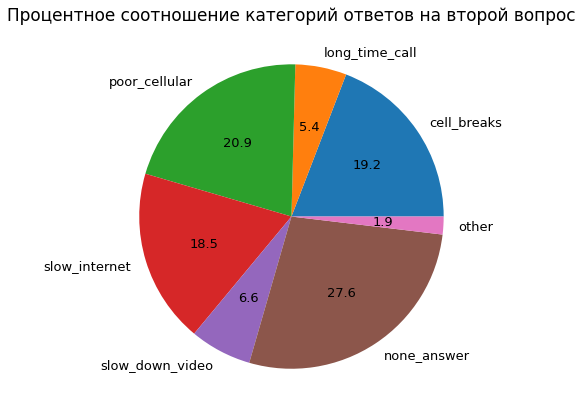

In [85]:
# Выбираем только клиентов, которые ответили на оценки ниже 9 на Q1



# Создаем плот
fig = plt.figure(figsize=(7,7)) 
# Выставляем размер наших подписей
plt.rcParams.update({'font.size': 13})
# Добавляем pie chart с подписями и процентным соотношением
plt.pie(Q2_df[problem_list].sum(), labels=problem_list, autopct= '%.1f')
# Заголовок
plt.title('Процентное соотношение категорий ответов на второй вопрос', loc='center', fontsize=17)
plt.show()

Далее расмотрим три категории с наибольшим процентным соотношением.
 В их число вошли:
 Плохая связь в зданиях - 20,9 %
 Обрывы звонков - 19,2 %
 Медленный интернет - 18,5 %
 
По поводу воздержания ответов на вопросы  - 27,6 %

Проводить корреляционный анализ далее не имеет смысла, так как у нас категории и никаких связей корреляция не покажет, но стоит проанализировать те, параметры, которые могут влиять на оценку клиентов. Например,  возьмем категорию ответа "Медленный интернет" и рассмотрим параметр " Web Page Download Throughput(Kbps)".

Text(0.5, 1.0, 'Ящик с усами для групп 0 и 1, категория медленный интернет, скорость загрузки web-страниц через браузер')

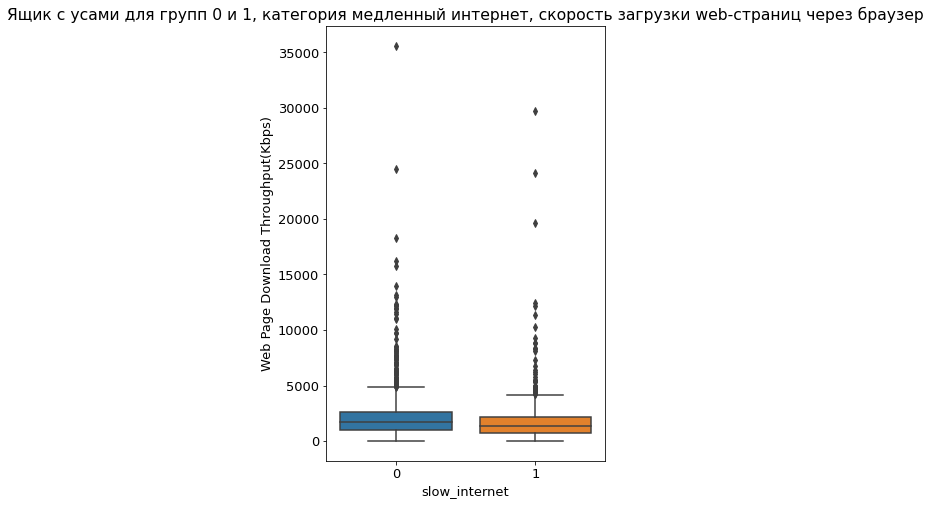

In [86]:
fig, ax = plt.subplots(figsize = (5, 8)) 
# создаем плот и ящик с усами
parameter = 'Web Page Download Throughput(Kbps)'
sns.boxplot( data=Q2_df, x='slow_internet', y=parameter)
ax.set_title("Ящик с усами для групп 0 и 1, категория медленный интернет, скорость загрузки web-страниц через браузер")

Так как опять "приличные" выбросы воспользуемся правилом трех сигм и далее посмотрим на распределение данных по параметру средняя скорость от абонента.

C:\Users\mvideo\AppData\Local\Temp/ipykernel_15016/3801263921.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[(data[column] < sigma_plus) & (data[column] > sigma_minus)][column]


Text(0.5, 1.0, 'Ящик с усами для групп 0 и 1, категория медленный интернет, скорость загрузки web-страниц через браузер')

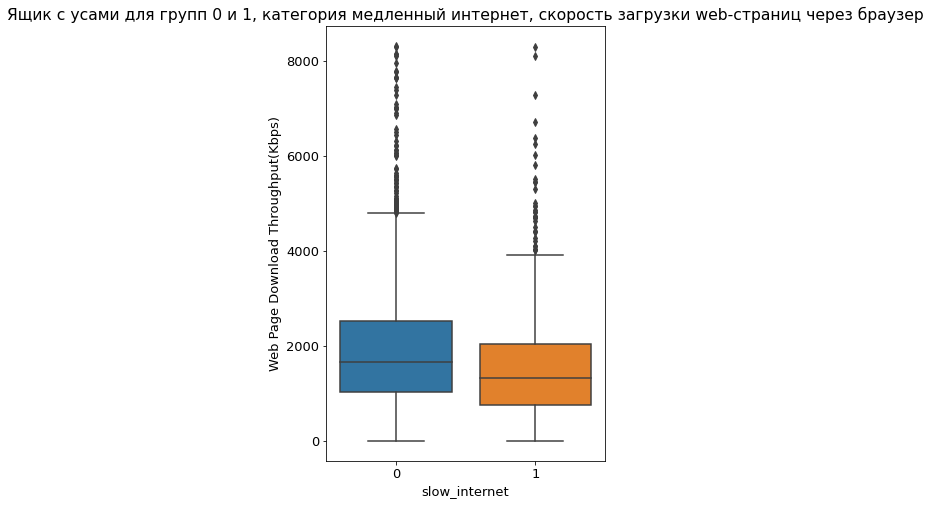

In [87]:
# отредактируем данные с помощью фнукции edit_data, которая уже ранее описывалась в предыдущей части
Q2_1_df = edit_data(Q2_df, parameter)

# вывод плота

fig, ax = plt.subplots(figsize = (5, 8)) 


sns.boxplot( data=Q2_1_df, x='slow_internet', y=parameter)
ax.set_title("Ящик с усами для групп 0 и 1, категория медленный интернет, скорость загрузки web-страниц через браузер")

Text(0.5, 1.0, 'Гистограмма распределения, скорость загрузки web-страниц через браузер')

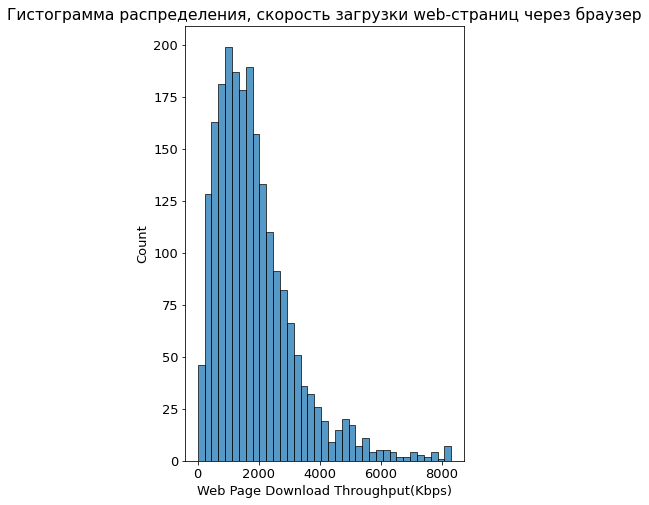

In [88]:
# вывод гистограммы распределения данных 
fig, ax = plt.subplots(figsize = (5, 8)) 

sns.histplot( data = Q2_1_df, x = parameter)
ax.set_title("Гистограмма распределения, скорость загрузки web-страниц через браузер")

2.2 Данные по этому параметру распределены ненормально, воспользуемся для стат. теста критерием Манна-Утни, затем бутстрэпом.
H0: Скорость загрузки web-страниц через браузер не оказывает влияние на категорию ответа "медленный интернет".
H1:Скорость загрузки web-страниц через браузера влияет  на категорию ответа "медленный интернет".

In [89]:
U1, p = mannwhitneyu(Q2_1_df[Q2_1_df['slow_internet']== 0][parameter].dropna(),
                     Q2_1_df[Q2_1_df['slow_internet']== 1][parameter].dropna() )
print(f'P-value {parameter} между двумя группами клиентов равен {p}')

P-value Web Page Download Throughput(Kbps) между двумя группами клиентов равен 1.6311314509078985e-11


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


{'quants':                 0
 0.025  266.989406
 0.975  444.446672,
 'p_value': 8.458428152414124e-16,
 'Parameter': 'Web Page Download Throughput(Kbps)'}

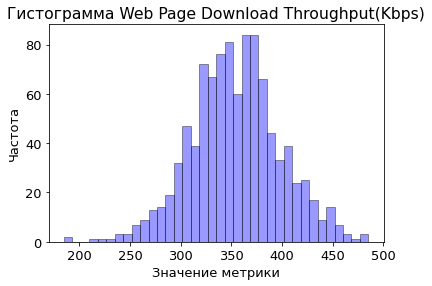

In [90]:
get_bootstrap(Q2_1_df[Q2_1_df['slow_internet']== 0][parameter].dropna(),
           Q2_1_df[Q2_1_df['slow_internet']== 1][parameter].dropna(), 
            parameter)

Вывод касательно второй части , вопроса Q2 и выбора параметра, Скорость загрузки web-страниц через браузера, влияет на категорию ответа "Медленный интеренет", так как значения P-value < 0.05. Поэтому стоит рассмотреть данный параметр для улучшения оценок абонентов в будущем. 

3.1 Далее рассмотрим параметр Объем трафика передачи данных и второй вопрос Q2, категорию обрывы звонков. Если пользователь часто использует мобильный интернет и связывается с другими абонентами с помощью мессенджеров.  Проведем разведовательный анализ.


Text(0.5, 1.0, 'Ящик с усами для групп 0 и 1, категория обрывы звонков, объем трафика передачи данных')

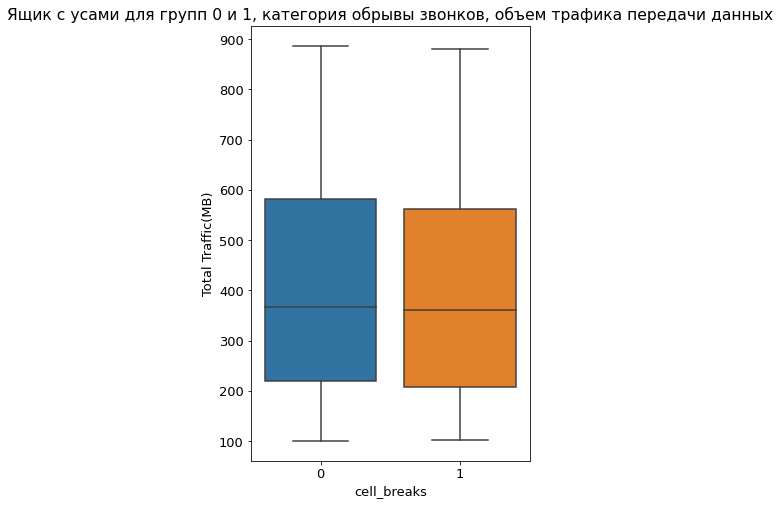

In [91]:
fig, ax = plt.subplots(figsize = (5, 8)) 
# создаем плот и ящик с усами
parameter_2 = 'Total Traffic(MB)'
sns.boxplot( data=Q2_df, x='cell_breaks', y=parameter_2)
ax.set_title("Ящик с усами для групп 0 и 1, категория обрывы звонков, объем трафика передачи данных")

Так как отсутствуют выбросы данных, редактирование с помощью правила трех сигм, не имеет смысла, перейдем к рассмотру распределения данных. 

Text(0.5, 1.0, 'Гистограмма распределения, объем трафика передачи данных')

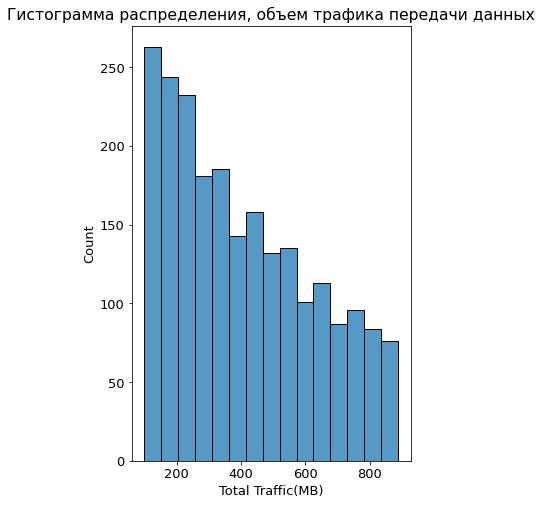

In [92]:
fig, ax = plt.subplots(figsize = (5, 8)) 


sns.histplot( data = Q2_df, x = parameter_2)
ax.set_title("Гистограмма распределения, объем трафика передачи данных")

H0: Объем трафика передачи данных не оказывает влияние на категорию ответа «обрывы звонков".
 H1: Объем трафика передачи данных влияет на категорию ответа " обрывы звонков ".


In [93]:
U1, p = mannwhitneyu(Q2_df[Q2_df['cell_breaks']== 0][parameter_2].dropna(),
                     Q2_df[Q2_df['cell_breaks']== 1][parameter_2].dropna() )
print(f'P-value {parameter_2} между двумя группами клиентов равен {p}')

P-value Total Traffic(MB) между двумя группами клиентов равен 0.30721473195927107


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


{'quants':                0
 0.025  -6.117843
 0.975  24.206222,
 'p_value': 0.21294952330535322,
 'Parameter': 'Total Traffic(MB)'}

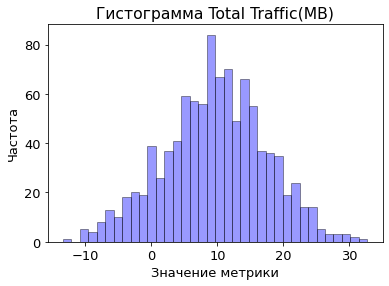

In [94]:
get_bootstrap(Q2_df[Q2_df['cell_breaks']== 0][parameter_2].dropna(),
           Q2_df[Q2_df['cell_breaks']== 1][parameter_2].dropna(), 
            parameter_2)

Вывод по третий части:Объем трафика передачи данных никак не влияет на  оценку в категории опроса Q2, обрывы звонков. 

Общий вывод по проекту:
1. 72,3 % из опрошенных клиентов не удовлетворены качеством услуг.
2. Улучшая такие характеристики сетевого пакета, такие как Средняя скорость к абоненту, Скорость загрузки потокового видео, Задержка старта воспроизведения видео и Пинг при просмотре web-страниц, в будущем можно рассчитывать на более лучшие оценки от абонентов.
3. В основном, клиенты жалуются на определенные проблемы при использовании связи:
Плохая связь в зданиях - 20,9 %
Обрывы звонков - 19,2 %
Медленный интернет - 18,5 %
4. Также присутствует связь между опросом Q2, конкретнее, категории медленный интернет и Скорость загрузки web-страниц через браузер. У абонентов, которые не удволетворены этой категорией, скорость загрузки web-страниц меньше.
5. Объем передачи трафика не влияет на оценку абонентов. 